# LINEAR REGRESSION 

### Car resale price prediction model

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
# loading the data from csv file to pandas dataframe
df = pd.read_csv('B:\\INDIVIDUAL PROJECTS\\MACHINE LEARNING\\Car project\\car data.csv')

In [270]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### EDA & Feature Engineering

In [271]:
df.shape


(301, 9)

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [273]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

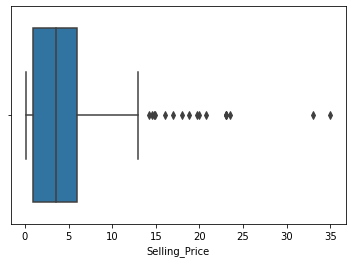

In [274]:
sns.boxplot(df['Selling_Price'])

In [275]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KM_in_1000s'>

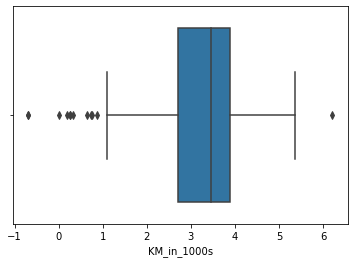

In [315]:
sns.boxplot(df['KM_in_1000s'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Present_Price'>

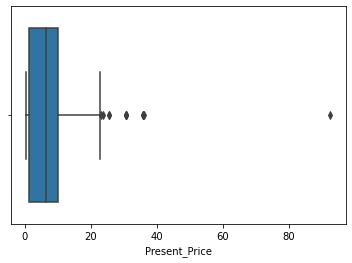

In [277]:
sns.boxplot(df['Present_Price'])

In [278]:
# checking the number of missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [279]:
# checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [280]:
# Since there are only rows with fuel type as CNG, it is better to delete it and move forward with petrol and diesel.
df = df[df['Fuel_Type'] != 'CNG']

In [281]:
df.shape

(299, 9)

In [282]:
print(df.Fuel_Type.value_counts())


Petrol    239
Diesel     60
Name: Fuel_Type, dtype: int64


In [283]:
# finding the age of the car form the year of launch
df['Age'] = 2023 - df['Year']
df.drop('Year',axis=1,inplace = True)

C:\Users\SHALVIN\AppData\Local\Temp\ipykernel_15432\2394095318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = 2023 - df['Year']
C:\Users\SHALVIN\AppData\Local\Temp\ipykernel_15432\2394095318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Year',axis=1,inplace = True)


In [284]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [285]:
unique_values = df['Owner'].unique()
print(unique_values)

[0 1 3]


In [286]:
value_counts = df['Owner'].value_counts()
print(value_counts)


0    288
1     10
3      1
Name: Owner, dtype: int64


In [287]:
df.drop('Owner', axis=1, inplace=True)


C:\Users\SHALVIN\AppData\Local\Temp\ipykernel_15432\4232287826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Owner', axis=1, inplace=True)


In [288]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,9


In [289]:
df['Kms_Driven']=df['Kms_Driven']/1000

C:\Users\SHALVIN\AppData\Local\Temp\ipykernel_15432\2171233497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kms_Driven']=df['Kms_Driven']/1000


In [290]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Age
0,ritz,3.35,5.59,27.00,Petrol,Dealer,Manual,9
1,sx4,4.75,9.54,43.00,Diesel,Dealer,Manual,10
2,ciaz,7.25,9.85,6.90,Petrol,Dealer,Manual,6
3,wagon r,2.85,4.15,5.20,Petrol,Dealer,Manual,12
4,swift,4.60,6.87,42.45,Diesel,Dealer,Manual,9


In [291]:
df.rename(columns={'Kms_Driven': 'KM_in_1000s'}, inplace=True)


C:\Users\SHALVIN\AppData\Local\Temp\ipykernel_15432\3585893281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Kms_Driven': 'KM_in_1000s'}, inplace=True)


In [292]:
df.head()

,Car_Name,Selling_Price,Present_Price,KM_in_1000s,Fuel_Type,Seller_Type,Transmission,Age
0,ritz,3.35,5.59,27.00,Petrol,Dealer,Manual,9
1,sx4,4.75,9.54,43.00,Diesel,Dealer,Manual,10
2,ciaz,7.25,9.85,6.90,Petrol,Dealer,Manual,6
3,wagon r,2.85,4.15,5.20,Petrol,Dealer,Manual,12
4,swift,4.60,6.87,42.45,Diesel,Dealer,Manual,9


In [293]:
# Using one hot encoding to convert all the categorical variables
car_d=pd.get_dummies(df[['Fuel_Type','Seller_Type','Transmission']], drop_first=True)

In [294]:
car_d.head()

,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,1,0,1
1,0,0,1
2,1,0,1
3,1,0,1
4,0,0,1


In [295]:
#Dropping the orginal columns
df.drop(columns=['Fuel_Type','Seller_Type','Transmission'], inplace=True)

C:\Users\SHALVIN\AppData\Local\Temp\ipykernel_15432\904896820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Fuel_Type','Seller_Type','Transmission'], inplace=True)


In [296]:
# Concatinating the dummy columns to create a complete dataframe which is ready for regression.
df = pd.concat([df, car_d], axis=1)

In [297]:
df.head()

,Car_Name,Selling_Price,Present_Price,KM_in_1000s,Age,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27.00,9,1,0,1
1,sx4,4.75,9.54,43.00,10,0,0,1
2,ciaz,7.25,9.85,6.90,6,1,0,1
3,wagon r,2.85,4.15,5.20,12,1,0,1
4,swift,4.60,6.87,42.45,9,0,0,1


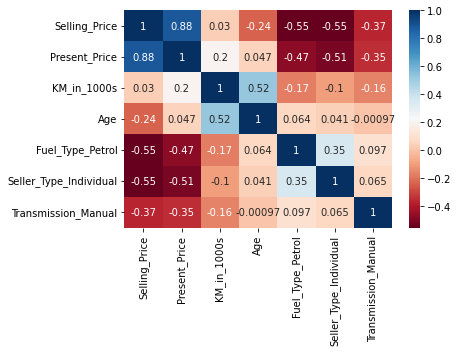

In [298]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

In [299]:
df.drop(labels='Car_Name',axis= 1, inplace = True)


In [300]:
df.head()

,Selling_Price,Present_Price,KM_in_1000s,Age,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27.00,9,1,0,1
1,4.75,9.54,43.00,10,0,0,1
2,7.25,9.85,6.90,6,1,0,1
3,2.85,4.15,5.20,12,1,0,1
4,4.60,6.87,42.45,9,0,0,1


In [301]:
import numpy as np

# List of columns to transform
columns_to_transform = ['Present_Price', 'KM_in_1000s','Selling_Price']

# Apply the transformation
for col in columns_to_transform:
    df[col] = np.log(df[col])


In [302]:
df

,Selling_Price,Present_Price,KM_in_1000s,Age,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,1.208960,1.720979,3.295837,9,1,0,1
1,1.558145,2.255493,3.761200,10,0,0,1
2,1.981001,2.287471,1.931521,6,1,0,1
3,1.047319,1.423108,1.648659,12,1,0,1
4,1.526056,1.927164,3.748327,9,0,0,1
...,...,...,...,...,...,...,...
296,2.251292,2.451005,3.526008,7,0,0,1
297,1.386294,1.774952,4.094345,8,1,0,1
298,1.208960,2.397895,4.476587,14,1,0,1
299,2.442347,2.525729,2.197225,6,0,0,1


In [226]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [303]:
# splitting it into dependent and independent variables.
X = df[['Present_Price','KM_in_1000s', 'Age', 'Fuel_Type_Petrol','Seller_Type_Individual']]
y = df['Selling_Price']


In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)


In [305]:
import statsmodels.api as sm


In [306]:
X_train_sm = sm.add_constant(X_train)  # Adding a constant term to the predictor




In [307]:
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

In [308]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2012.
Date:                Sat, 30 Sep 2023   Prob (F-statistic):          8.87e-171
Time:                        18:53:07   Log-Likelihood:                 64.476
No. Observations:                 209   AIC:                            -117.0
Df Residuals:                     203   BIC:                            -96.90
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

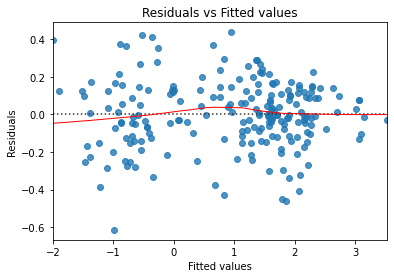

In [309]:
# Extract fitted values and residuals
fitted_values = results.fittedvalues
residuals = results.resid

# Plot residuals vs. fitted values
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()


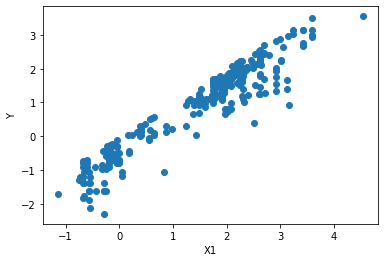

In [310]:
# Scatter plot
plt.scatter(df['Present_Price'], df['Selling_Price'])
plt.xlabel('X1')
plt.ylabel('Y')
plt.show()

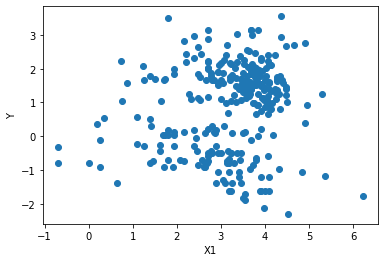

In [311]:
# Scatter plot
plt.scatter(df['KM_in_1000s'], df['Selling_Price'])
plt.xlabel('X1')
plt.ylabel('Y')
plt.show()

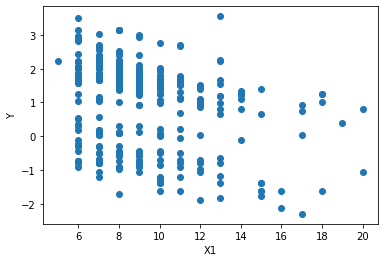

In [312]:
# Scatter plot
plt.scatter(df['Age'], df['Selling_Price'])
plt.xlabel('X1')
plt.ylabel('Y')
plt.show()

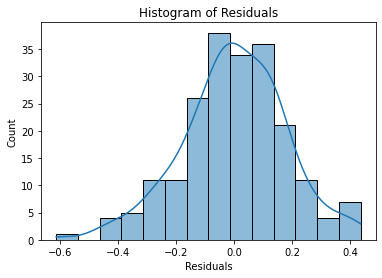

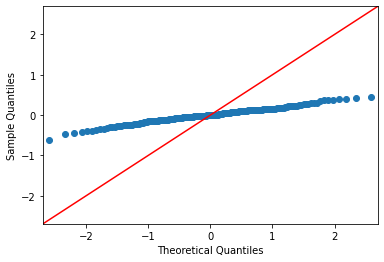

In [313]:
# Normality of residuals.
# Histogram
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='45')
plt.show()


In [314]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict with the statsmodels model
X_test_sm = sm.add_constant(X_test)  # Add constant
y_pred = results.predict(X_test_sm)

# Evaluate the predictions
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # set squared=False for RMSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.19
R-squared: 0.98


SUMMARY

After doing the EDA and selecting the essentail variables, we made a normal model using statsmodel library.

The summary of the first model
-> The p-values of all the variables came below 0.05 and the R2 and adjusted R2 was 0.82 and 0.81 respectively.
-> But all the basic assumptions was not satisfied. It shown heteroskedasticity.

Second model
-> To avoid the problem, we took log transformation for the dependent and 2 other independent variables. 
-> Now all the assumptions were satisfied. But one variable become insignificant because of higher p-value.

Third model
-> It has satisfied all assumptions and the all the variables are significant.
-> R2 and adjusted R2 value are 0.98 and 0.98.

Testing this 3rd model, we got the following values. 

Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.19
R-squared: 0.98

Since the MAE and MSE values compartively closer to zero, the models performance is good enough.